# Project

## 01 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

## 02 Import data

In [2]:
data_sales = pd.read_excel(r'sales.xlsx')
ds= pd.DataFrame(data=data_sales)

data_crm = pd.read_csv(r'crm.csv')
dc = pd.DataFrame(data=data_crm)

data_mkt = pd.read_csv(r'mkt.csv') 
dm = pd.DataFrame(data=data_mkt)


### 0201 clean data_sales



### 020101 Structure

In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             7008 non-null   int64  
 1   Date_Adherence         7008 non-null   object 
 2   Recency                6985 non-null   float64
 3   MntMeat&Fish           7008 non-null   float64
 4   MntEntries             7008 non-null   int64  
 5   MntVegan&Vegetarian    7008 non-null   float64
 6   MntDrinks              6980 non-null   float64
 7   MntDesserts            7008 non-null   float64
 8   MntAdditionalRequests  7008 non-null   float64
 9   NumOfferPurchases      7008 non-null   int64  
 10  NumAppPurchases        7008 non-null   int64  
 11  NumTakeAwayPurchases   7008 non-null   int64  
 12  NumStorePurchases      7008 non-null   int64  
 13  NumAppVisitsMonth      7008 non-null   int64  
 14  Complain               7008 non-null   int64  
dtypes: f

In [19]:
# analise duplicates as a whole and in the desired index variable

dsw = ds

# as a whole
dsw[dsw.duplicated()]

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
2432,26891,2022-03-21 00:00:00,13.0,610.0,320,915.0,20.0,240.0,78.0,2,6,3,2,6,0
3488,17069,2020-11-24 00:00:00,32.0,1320.0,280,390.0,180.0,100.0,28.0,5,7,2,3,8,0
4162,28844,2022-06-29 00:00:00,43.0,6050.0,140,1275.0,140.0,140.0,7.0,1,10,3,10,4,0
4961,28688,2020-12-29 00:00:00,43.0,5940.0,120,570.0,120.0,120.0,25.0,4,9,3,10,7,0
5009,5627,2022-04-28 00:00:00,31.0,130.0,0,120.0,20.0,20.0,5.0,1,3,1,4,3,0
5310,15905,2020-09-04 00:00:00,3.0,8900.0,1260,4380.0,0.0,500.0,12.0,4,10,5,7,6,0
5319,20747,2020-08-14 00:00:00,63.0,2540.0,1420,6705.0,2020.0,2840.0,20.0,1,5,5,8,1,0
6948,28625,2021-12-25 00:00:00,35.0,60.0,120,120.0,180.0,180.0,18.0,3,4,2,3,6,0


In [20]:
# in index to be
dsw[dsw.duplicated(subset=['CustomerID'])]

,CustomerID,Date_Adherence,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
2432,26891,2022-03-21 00:00:00,13.0,610.0,320,915.0,20.0,240.0,78.0,2,6,3,2,6,0
3488,17069,2020-11-24 00:00:00,32.0,1320.0,280,390.0,180.0,100.0,28.0,5,7,2,3,8,0
4162,28844,2022-06-29 00:00:00,43.0,6050.0,140,1275.0,140.0,140.0,7.0,1,10,3,10,4,0
4961,28688,2020-12-29 00:00:00,43.0,5940.0,120,570.0,120.0,120.0,25.0,4,9,3,10,7,0
5009,5627,2022-04-28 00:00:00,31.0,130.0,0,120.0,20.0,20.0,5.0,1,3,1,4,3,0
5310,15905,2020-09-04 00:00:00,3.0,8900.0,1260,4380.0,0.0,500.0,12.0,4,10,5,7,6,0
5319,20747,2020-08-14 00:00:00,63.0,2540.0,1420,6705.0,2020.0,2840.0,20.0,1,5,5,8,1,0
6948,28625,2021-12-25 00:00:00,35.0,60.0,120,120.0,180.0,180.0,18.0,3,4,2,3,6,0


In [21]:
#remove duplicates
dsw.drop_duplicates(inplace=True)
dsw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             7000 non-null   int64  
 1   Date_Adherence         7000 non-null   object 
 2   Recency                6977 non-null   float64
 3   MntMeat&Fish           7000 non-null   float64
 4   MntEntries             7000 non-null   int64  
 5   MntVegan&Vegetarian    7000 non-null   float64
 6   MntDrinks              6972 non-null   float64
 7   MntDesserts            7000 non-null   float64
 8   MntAdditionalRequests  7000 non-null   float64
 9   NumOfferPurchases      7000 non-null   int64  
 10  NumAppPurchases        7000 non-null   int64  
 11  NumTakeAwayPurchases   7000 non-null   int64  
 12  NumStorePurchases      7000 non-null   int64  
 13  NumAppVisitsMonth      7000 non-null   int64  
 14  Complain               7000 non-null   int64  
dtypes: f

In [22]:
# change MntEntries dtype to float32 - "Experiment-usefull in situations in wich is important to save space"
# the dataset size decreases from 875.0 KB to 629.8 KB, a 28.1% decrease 

dsw[["Recency","MntMeat&Fish","MntEntries","MntVegan&Vegetarian","MntDrinks","MntDesserts","MntAdditionalRequests"]] = dsw[["Recency","MntMeat&Fish","MntEntries","MntVegan&Vegetarian","MntDrinks","MntDesserts","MntAdditionalRequests"]].astype("float32")
dsw.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 7007
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             7000 non-null   int64  
 1   Date_Adherence         7000 non-null   object 
 2   Recency                6977 non-null   float32
 3   MntMeat&Fish           7000 non-null   float32
 4   MntEntries             7000 non-null   float32
 5   MntVegan&Vegetarian    7000 non-null   float32
 6   MntDrinks              6972 non-null   float32
 7   MntDesserts            7000 non-null   float32
 8   MntAdditionalRequests  7000 non-null   float32
 9   NumOfferPurchases      7000 non-null   int64  
 10  NumAppPurchases        7000 non-null   int64  
 11  NumTakeAwayPurchases   7000 non-null   int64  
 12  NumStorePurchases      7000 non-null   int64  
 13  NumAppVisitsMonth      7000 non-null   int64  
 14  Complain               7000 non-null   int64  
dtypes: f

In [23]:
# analising distribution in non complete fileds in order to evaluate the type of replacement

dsw.describe()

#I would substitute the Recency values for 0 (acceptable value) or the mean
#As to the Mnt Drinks I would see its correlations Choose a strong one to predict a value 

,CustomerID,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
count,7000.000000,6977.000000,7000.000000,7000.000000,7000.000000,6972.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,20066.401571,49.235058,3079.522949,534.749451,2785.052246,545.657532,540.656006,42.556179,2.448429,6.015714,3.834571,5.790571,5.278286,0.010286
std,8684.030062,28.922686,3370.369629,787.845642,3908.729004,805.151367,802.223572,49.650780,2.306968,2.745537,3.331142,3.295708,2.748596,0.100903
min,5078.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12507.500000,24.000000,250.000000,40.000000,240.000000,40.000000,40.000000,9.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.000000
50%,20099.000000,49.000000,1820.000000,180.000000,1110.000000,180.000000,180.000000,24.000000,2.000000,6.000000,3.000000,5.000000,5.000000,0.000000
75%,27587.750000,74.000000,5070.000000,680.000000,3795.000000,700.000000,680.000000,57.000000,3.000000,8.000000,5.000000,8.000000,7.000000,0.000000
max,35072.000000,99.000000,14980.000000,3980.000000,25974.000000,3980.000000,3980.000000,249.000000,16.000000,13.000000,24.000000,13.000000,20.000000,1.000000


In [24]:
dsw.describe(include = ['O'])

,Date_Adherence
count,7000
unique,701
top,2020-09-19 00:00:00
freq,23


In [25]:
# aplicar nas tabelas de mkt e crm
#dsw['accommodates'].value_counts()

In [55]:
#Pearson's correlation
dsw.corr(method = 'pearson')

,CustomerID,Recency,MntMeat&Fish,MntEntries,MntVegan&Vegetarian,MntDrinks,MntDesserts,MntAdditionalRequests,NumOfferPurchases,NumAppPurchases,NumTakeAwayPurchases,NumStorePurchases,NumAppVisitsMonth,Complain
CustomerID,1.000000,0.013279,0.005683,-0.001099,0.019932,-0.006187,0.003323,0.010610,0.001856,-0.004408,0.009246,-0.006536,-0.009195,0.012503
Recency,0.013279,1.000000,0.035140,0.003888,0.029981,0.011947,0.017659,0.005771,0.013891,0.020189,0.035676,0.018100,-0.009371,0.006287
MntMeat&Fish,0.005683,0.035140,1.000000,0.391166,0.475275,0.389051,0.405025,0.383335,-0.042370,0.584808,0.528197,0.630305,-0.296476,-0.012005
MntEntries,-0.001099,0.003888,0.391166,1.000000,0.458884,0.557617,0.566151,0.371052,-0.152601,0.293038,0.423705,0.451002,-0.385942,-0.006930
MntVegan&Vegetarian,0.019932,0.029981,0.475275,0.458884,1.000000,0.458992,0.457396,0.289569,0.040602,0.180863,0.749741,0.363345,-0.512917,-0.008457
MntDrinks,-0.006187,0.011947,0.389051,0.557617,0.458992,1.000000,0.551009,0.380524,-0.145420,0.301512,0.418296,0.461710,-0.380616,-0.001328
MntDesserts,0.003323,0.017659,0.405025,0.566151,0.457396,0.551009,1.000000,0.374886,-0.148954,0.307819,0.417973,0.460229,-0.381555,-0.005117
MntAdditionalRequests,0.010610,0.005771,0.383335,0.371052,0.289569,0.380524,0.374886,1.000000,0.010320,0.408826,0.342476,0.395619,-0.190291,-0.012190
NumOfferPurchases,0.001856,0.013891,-0.042370,-0.152601,0.040602,-0.145420,-0.148954,0.010320,1.000000,0.108225,0.158578,-0.056106,0.307783,0.007189
NumAppPurchases,-0.004408,0.020189,0.584808,0.293038,0.180863,0.301512,0.307819,0.408826,0.108225,1.000000,0.271690,0.568527,-0.036875,-0.001615


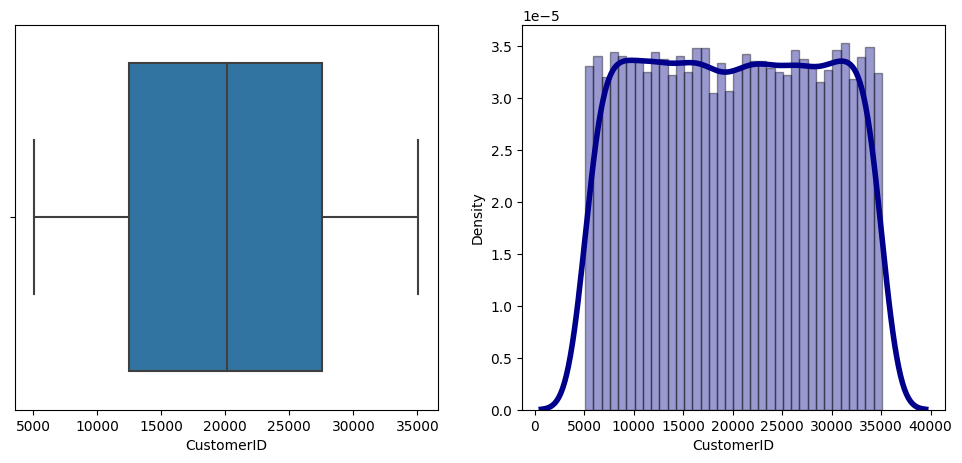

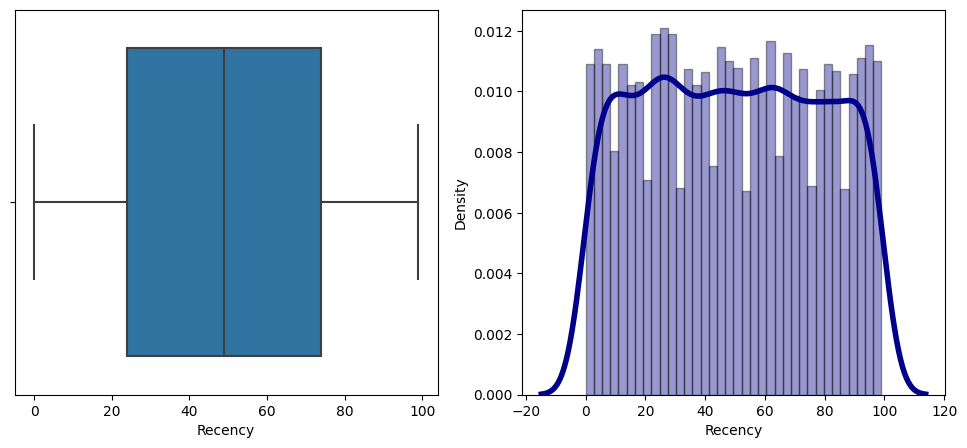

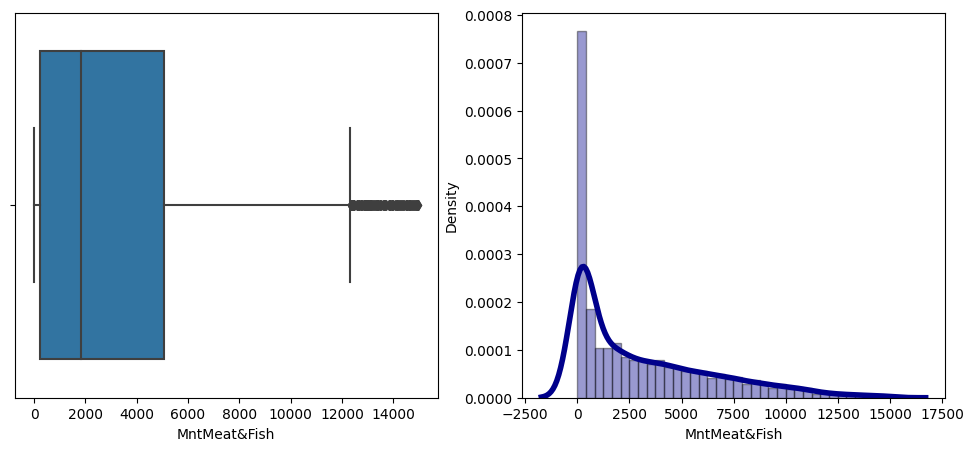

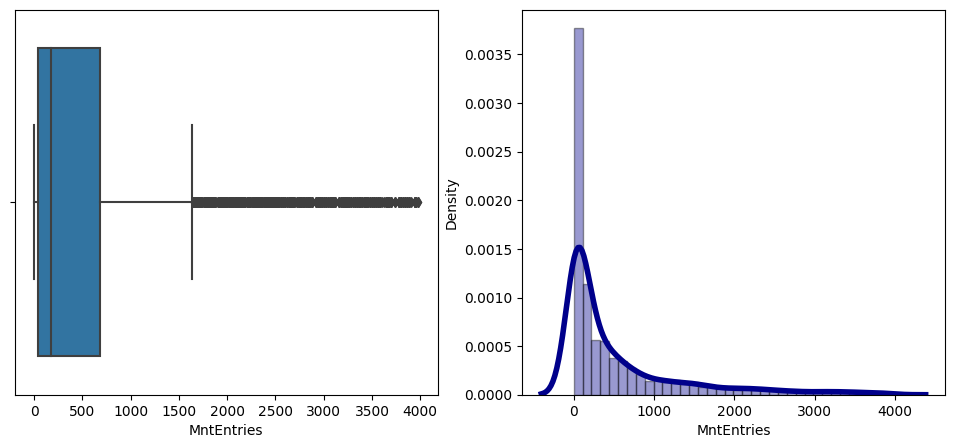

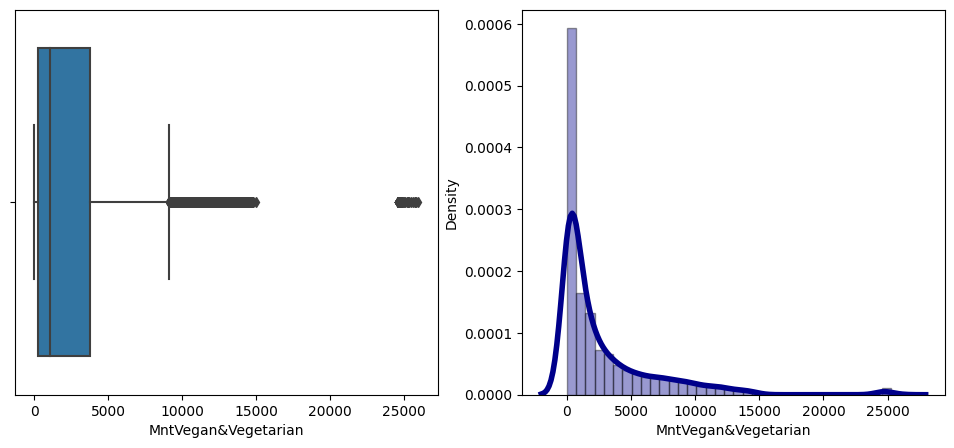

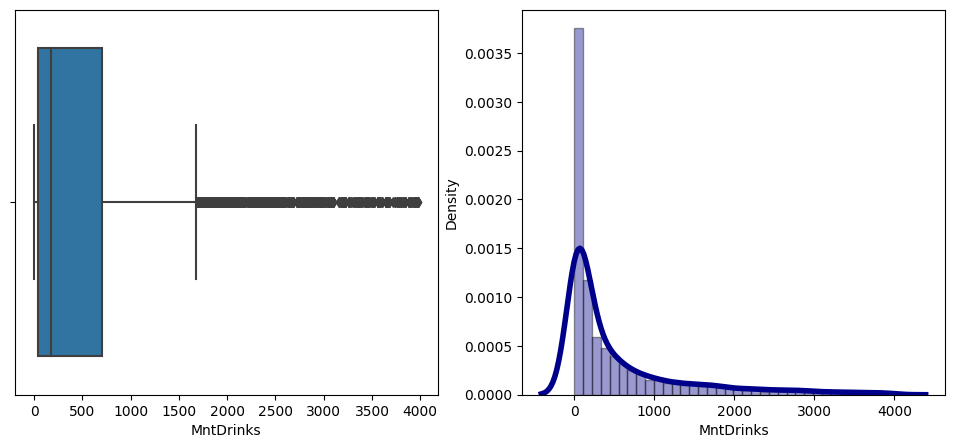

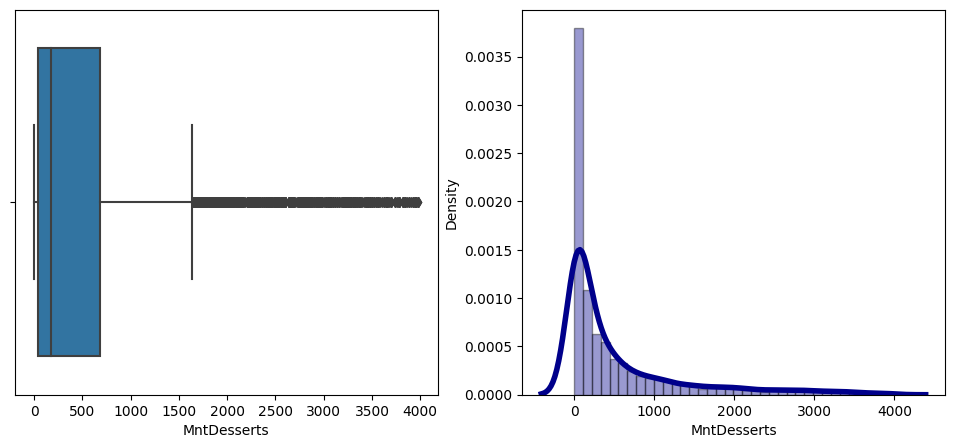

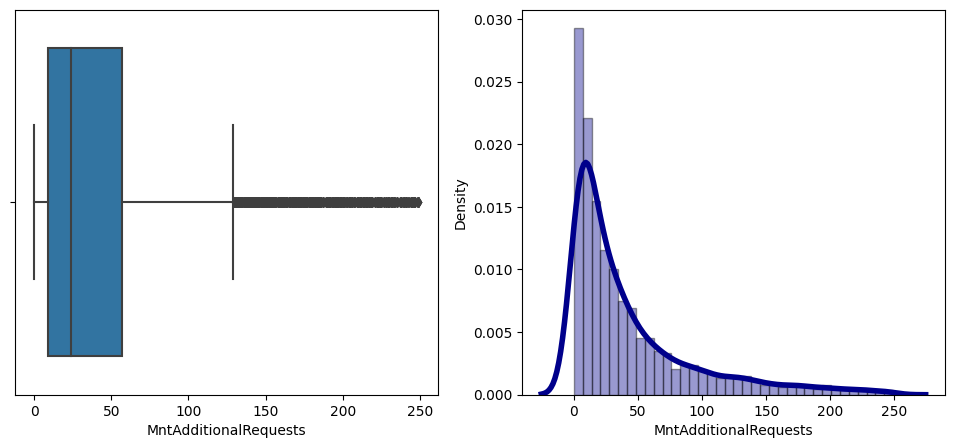

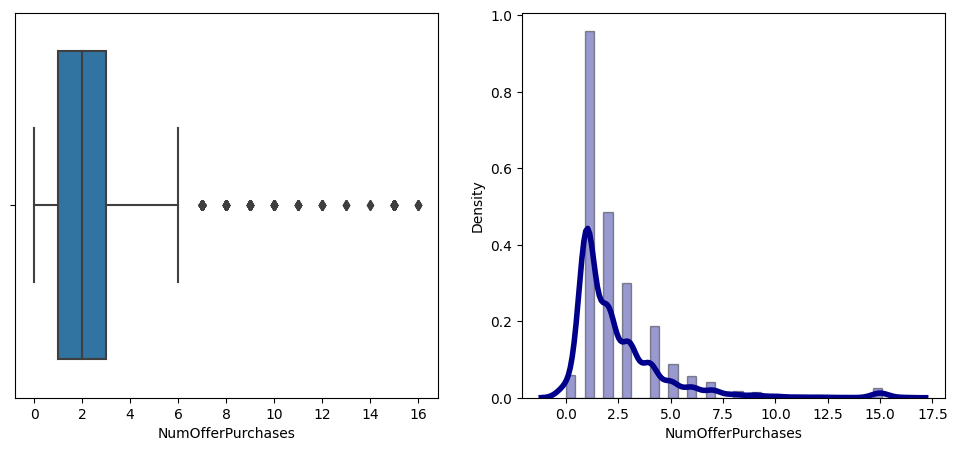

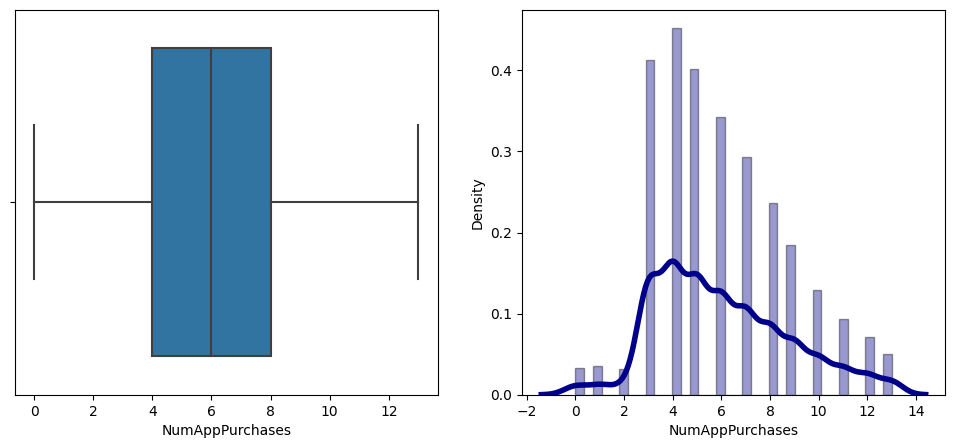

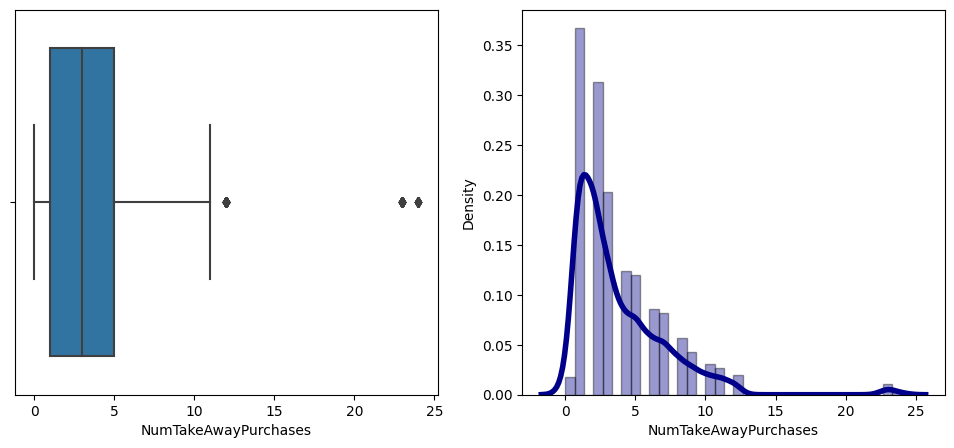

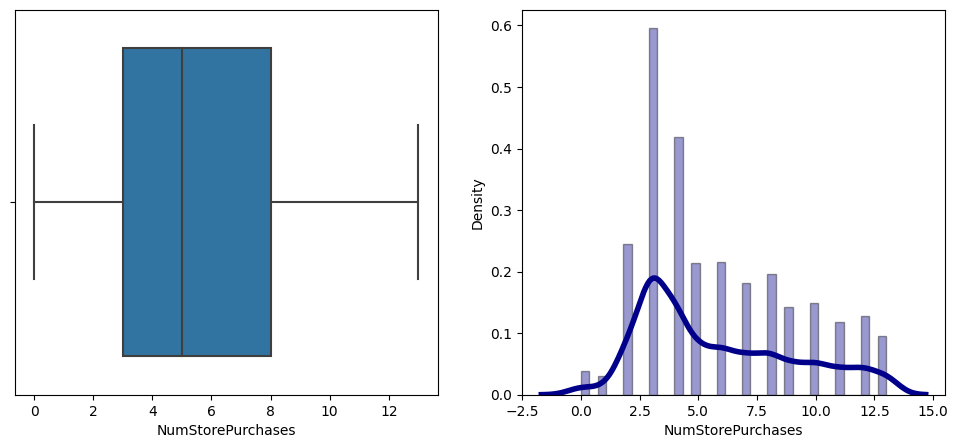

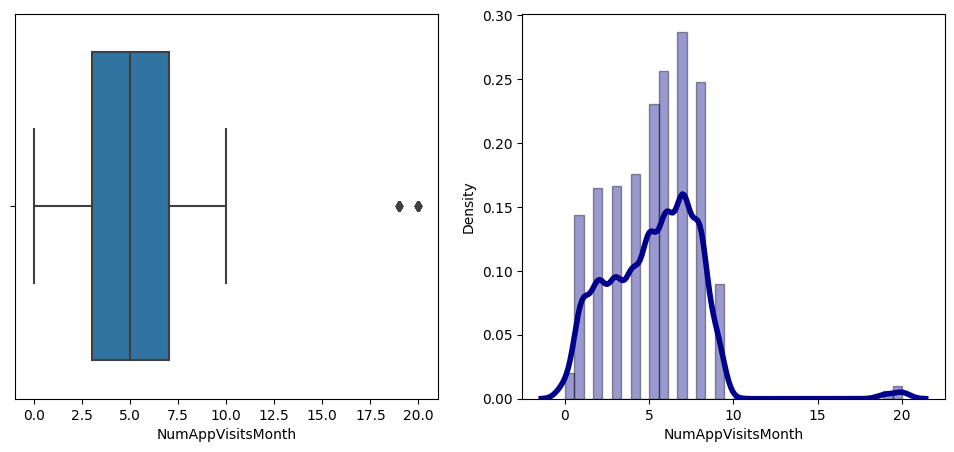

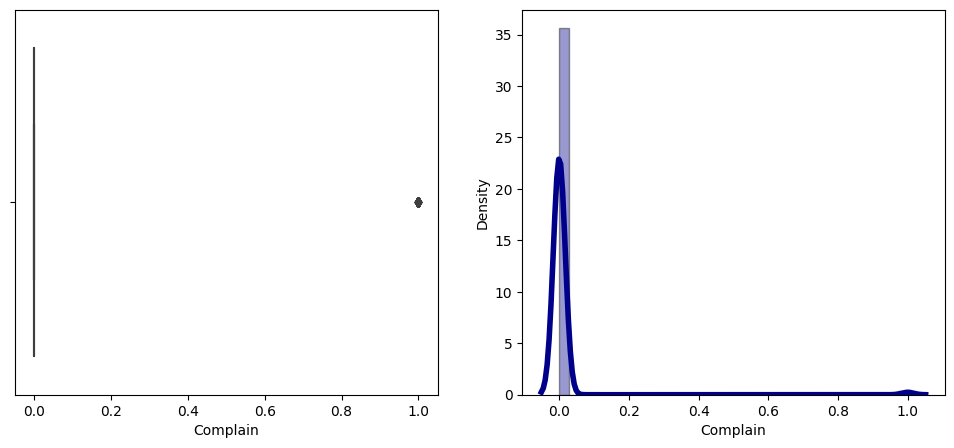

In [123]:
import warnings
warnings.filterwarnings('ignore')

aa=[]

for i in range(len(dsw.columns)):
    aa.append("a"+str(i))
for i in range(len(dsw.columns)):
    if(np.issubdtype(dsw[dsw.columns[i]].dtype, np.number)==True):
        fig, (aa[i], a2) = plt.subplots(1,2, figsize = (12,3))
        sns.boxplot(ax = aa[i], data = dsw, x = dsw.columns[i])
        #sns.displot(data=dsw, x=dsw.columns[i], kde=True)
        sns.distplot(dsw[dsw.columns[i]], hist=True, kde=True,bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [59]:
dsw.columns

Index(['CustomerID', 'Date_Adherence', 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Complain'],
      dtype='object')

In [ ]:
aa=["a1","a2","a3"]

fig, (aa[0], a2, a3) = plt.subplots(1,1, figsize = (12,5))
sns.boxplot(ax = aa[0], data = dsw, x = dsw.columns[0])
sns.boxplot(ax = a2, data = dsw, x = dsw.columns[9])
sns.boxplot(ax = a3, data = dsw, x = dsw.columns[4])

<Axes: xlabel='MntVegan&Vegetarian'>

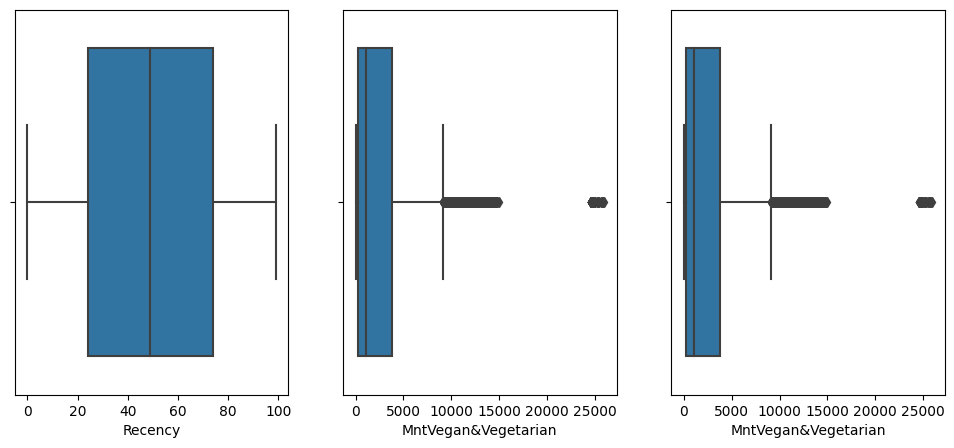

In [81]:
fieds_all=["Recency", ""]


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,5))
sns.boxplot(ax = ax1, data = dsw, x = 'Recency')
sns.boxplot(ax = ax2, data = dsw, x = 'MntVegan&Vegetarian')
sns.boxplot(ax = ax3, data = dsw, x = 'MntVegan&Vegetarian')

#fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,5))
#sns.boxplot(ax = ax1, data = dsw, x = 'MntMeat&Fish')
#sns.boxplot(ax = ax2, data = dsw, x = 'MntEntries')
#sns.boxplot(ax = ax3, data = dsw, x = 'MntVegan&Vegetarian')

NameError: name 'data' is not defined

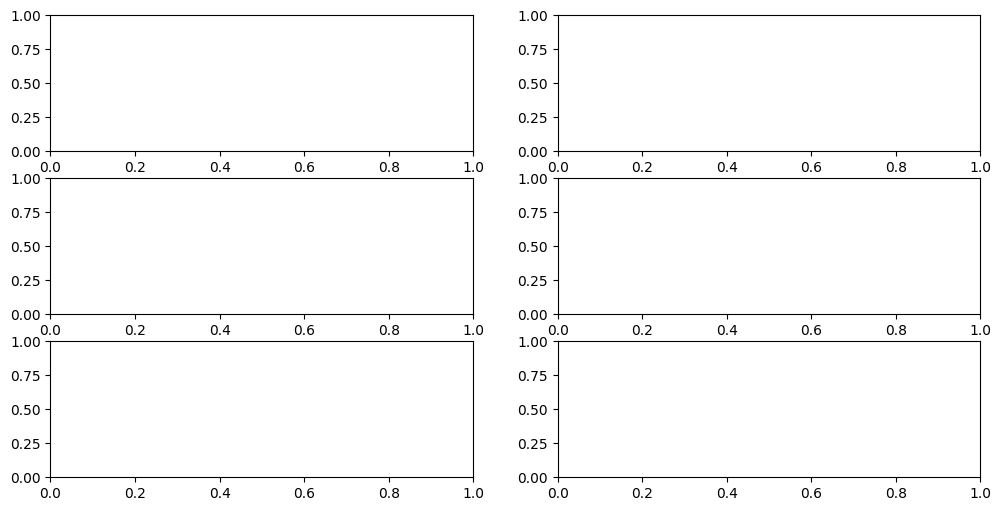

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# create dummy pandas dataframes
pd1 = pd.DataFrame({'a':np.random.random(22),'b':np.random.random(22),
                    'c':np.random.random(22)})
pd2 = pd.DataFrame({'J':np.random.random(22),'K':np.random.random(22),
                    'P':np.random.random(22)})


#create subplot figure with having two side by side plots
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(12,6))


# plot first pandas frame in subplot style
data.plot(ax = axes[:,0],subplots=True) 
# plot second pandas frame in subplot style
data.plot(ax = axes[:,1],subplots=True)

plt.show()

### Adding columns

In [5]:
#Average vs total types of ordering

dsw=dsw.rename(columns=
               {"MntMeat&Fish": "tot_mf",
                "MntVegan&Vegetarian":"tot_vg",
                "MntEntries":"tot_et",
                "MntDrinks":"tot_dr",
                "MntDesserts":"tot_ds",
                "MntAdditionalRequests":"tot_ad",
                "NumOfferPurchases":"tot_pur_offer",
                "NumTakeAwayPurchases":"tot_pur_tkawa",
                "NumStorePurchases":"tot_pur_store",
                "NumAppPurchases":"tot_pur_app",
                "NumAppVisitsMonth":"tot_vis_app"
               })
dsw["tot_pur"]=dsw["tot_pur_offer"]+dsw["tot_pur_tkawa"]+dsw["tot_pur_store"]+dsw["tot_pur_offer"]+dsw["tot_pur_app"]
dsw["avg_mf"]=dsw["tot_mf"]/dsw["tot_pur"]
dsw["avg_vg"]=dsw["tot_vg"]/dsw["tot_pur"]
dsw["avg_ds"]=dsw["tot_ds"]/dsw["tot_pur"]
dsw["avg_dr"]=dsw["tot_dr"]/dsw["tot_pur"]
dsw["avg_ad"]=dsw["tot_ad"]/dsw["tot_pur"]
dsw["avg_et"]=dsw["tot_et"]/dsw["tot_pur"]

print("Mean purchases")
print(dsw["tot_pur"].mean())
print("Sum purchases")
print(dsw["tot_pur"].sum())
print("Std purchases")
print("tot_pur_std = 8.98")
print("Sampling limits = 11.68 - 20.5 - 29.45")

print("Pearson")
dsw.corr(method = 'pearson').round(decimals=2, out=None)




NameError: name 'dsw' is not defined

Total purchases vs Total Meat and fish


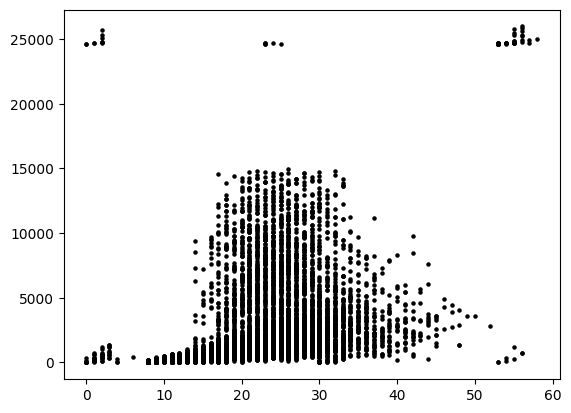

Total purchases vs Total Vegans


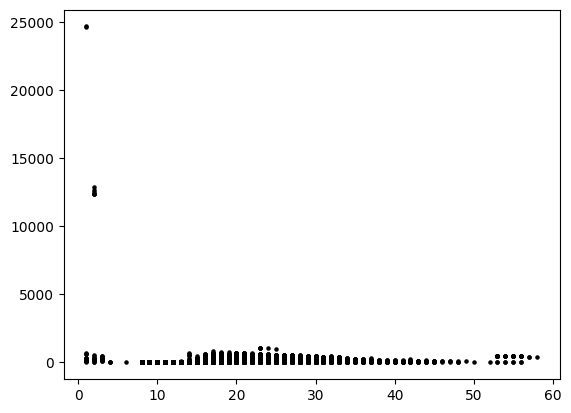

In [14]:
sample_ds=(dsw.query('tot_pur <= 29.45')).query('tot_pur >= 11.45')
hist = dsw["tot_pur"].hist(bins=100)

print("Total purchases vs Total Meat and fish")
plt.scatter(
    x=list(dsw["tot_pur"]),
    y=list(dsw["tot_vg"]),
    color ='k',
    s=5
)
plt.show()
print("Total purchases vs Total Vegans")
plt.scatter(
    x=list(dsw["tot_pur"]),
    y=list(dsw["avg_vg"]),
    color ='k',
    s=5
)
plt.show()

Histogram -  tot_mf


TypeError: can only concatenate str (not "int") to str

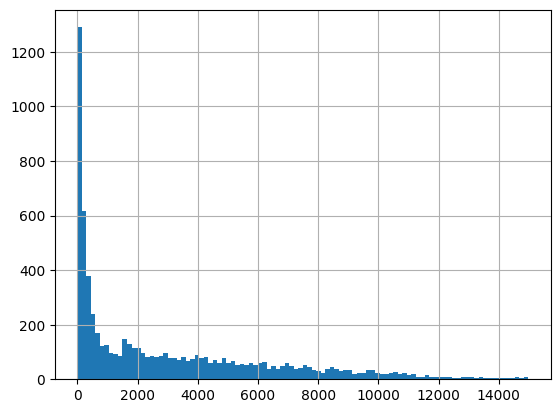

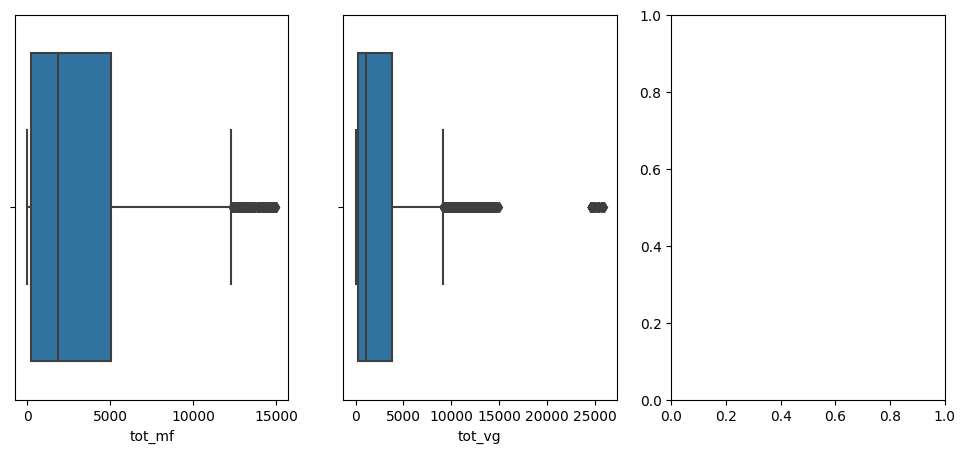

In [20]:

var_analisis = ["tot_mf","tot_vg","tot_ds"]

ii = 0

print("Histogram - ",var_analisis[0])
hist = dsw[var_analisis[ii]].hist(bins=100)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,5))
sns.boxplot(ax = ax1, data = dsw, x = var_analisis[ii])
sns.boxplot(ax = ax2, data = dsw, x = var_analisis[ii+1])
sns.boxplot(ax = ax3, data = dsw, x = var_analisis[ii]+2)

<Axes: xlabel='avg_vg'>

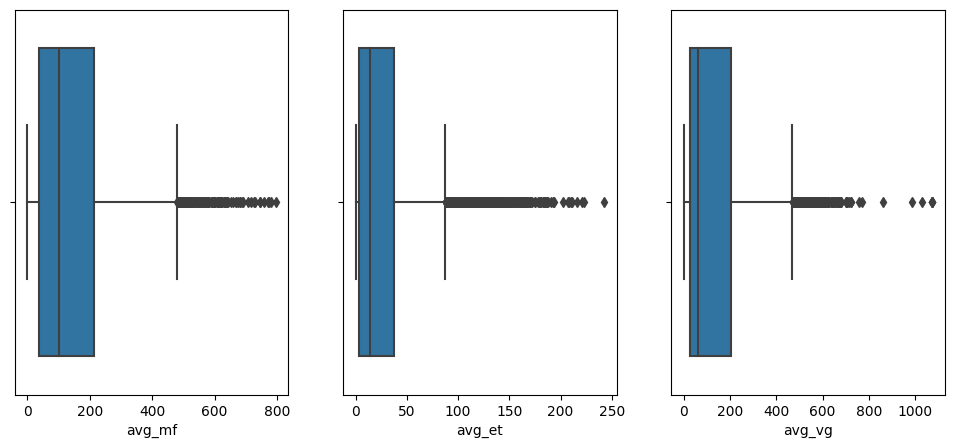

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,5))
sns.boxplot(ax = ax1, data = sample_ds, x = 'avg_mf')
sns.boxplot(ax = ax2, data = sample_ds, x = 'avg_et')
sns.boxplot(ax = ax3, data = sample_ds, x = 'avg_vg')

<Axes: xlabel='tot_vg'>

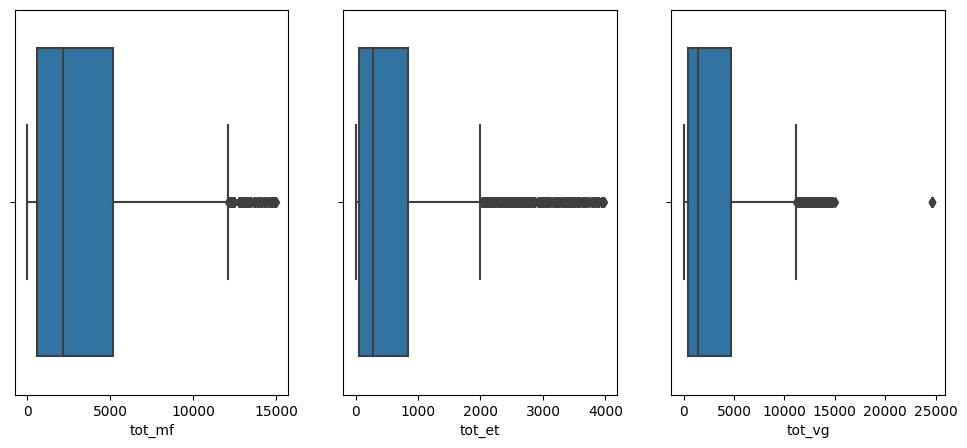

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,5))
sns.boxplot(ax = ax1, data = sample_ds, x = 'tot_mf')
sns.boxplot(ax = ax2, data = sample_ds, x = 'tot_et')
sns.boxplot(ax = ax3, data = sample_ds, x = 'tot_vg')
  

### Agregations

In [18]:
aa=dsw.rename(columns={"MntMeat&Fish": "MF","MntVegan&Vegetarian":"VG"})

filters=["MF == 0","MntEntries == 0","VG == 0","MntDesserts == 0","MntDrinks == 0","MntDesserts == 0","MntAdditionalRequests==0"]

aa["t"]=1

print("")
print("")
print("Sum of values")
print( pd.pivot_table(aa, values=["tot_mf","tot_vg",'tot_et',"tot_dr", 'tot_ds','tot_ad'], index=['t'],
                       aggfunc={"tot_mf":np.sum,'tot_vg': np.sum, 'tot_et': np.sum,'tot_dr': np.sum,
                                'tot_ds': np.sum, 'tot_ad': np.sum}))

print("")
print("")
print("Sum of values")
print( pd.pivot_table(aa, values=["tot_mf","tot_vg",'tot_et',"tot_dr", 'tot_ds','tot_ad'], index=['t'],
                       aggfunc={"tot_mf":np.average,'tot_vg': np.average, 'tot_et': np.average,'tot_dr': np.average,
                                'tot_ds': np.average, 'tot_ad': np.average}))

print("")
print("")
print("Average of averages")
print( pd.pivot_table(aa, values=["avg_mf","avg_vg",'avg_et',"avg_dr", 'avg_ds','avg_ad'], index=['t'],
                       aggfunc={"avg_mf":np.average,'avg_vg': np.average, 'avg_et': np.average,'avg_dr': np.average,
                                'avg_ds': np.average, 'avg_ad': np.average}))

print("")
print("")
print("Max of averages")
print( pd.pivot_table(aa, values=["tot_mf","tot_vg",'tot_et',"tot_dr", 'tot_ds','tot_ad'], index=['t'],
                       aggfunc={"avg_mf":np.max,'avg_vg': np.max, 'avg_et': np.max,'avg_dr': np.max,
                                'avg_ds': np.max, 'avg_ad': np.max}))

print("")
print("")
print("Min of averages")
print( pd.pivot_table(aa, values=["avg_mf","avg_vg",'avg_et',"avg_dr", 'avg_ds','avg_ad'], index=['t'],
                       aggfunc={"avg_mf":np.min,'avg_vg': np.min, 'avg_et': np.min,'avg_dr': np.min,
                                'avg_ds': np.min, 'avg_ad': np.min}))



Sum of values
        tot_ad     tot_dr      tot_ds     tot_et      tot_mf      tot_vg
t                                                                       
1  297893.3125  3804324.5  3784592.25  3743246.0  21556666.0  19495356.0


Sum of values
      tot_ad      tot_ds      tot_et       tot_mf       tot_vg
t                                                             
1  42.556187  540.656006  534.749451  3079.523682  2785.050781


Average of averages
   avg_mf  avg_vg
t                
1     inf     inf


Max of averages


KeyError: "Column(s) ['avg_ad', 'avg_dr', 'avg_ds', 'avg_et', 'avg_mf', 'avg_vg'] do not exist"

### 0202 clean dm

In [ ]:
df=dc

df.info()
print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())

ds.query('CustomerID == 17069')